In [1]:
!pip install kaggle

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d omkargurav/face-mask-dataset

100% 163M/163M [00:01<00:00, 76.3MB/s]
100% 163M/163M [00:01<00:00, 92.6MB/s]


In [4]:
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [6]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_3400.jpg', 'with_mask_1957.jpg', 'with_mask_708.jpg', 'with_mask_1208.jpg', 'with_mask_171.jpg']
['with_mask_2433.jpg', 'with_mask_1319.jpg', 'with_mask_1058.jpg', 'with_mask_1520.jpg', 'with_mask_1810.jpg']


In [7]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_3103.jpg', 'without_mask_1034.jpg', 'without_mask_1113.jpg', 'without_mask_3306.jpg', 'without_mask_2670.jpg']
['without_mask_1573.jpg', 'without_mask_2445.jpg', 'without_mask_3528.jpg', 'without_mask_904.jpg', 'without_mask_2310.jpg']


In [8]:
print('the number of person wearing masks : ',len(with_mask_files))
print('the number of person not wearing masks : ',len(without_mask_files))

the number of person wearing masks :  3725
the number of person not wearing masks :  3828


with mask --> 1

without mask --> 0

In [9]:
with_mask_labels = [0]*3725
without_mask_labels = [1]*3828

In [10]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[0, 0, 0, 0, 0]
[1, 1, 1, 1, 1]


In [11]:
labels = with_mask_labels + without_mask_labels
print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[0, 0, 0, 0, 0]
[1, 1, 1, 1, 1]


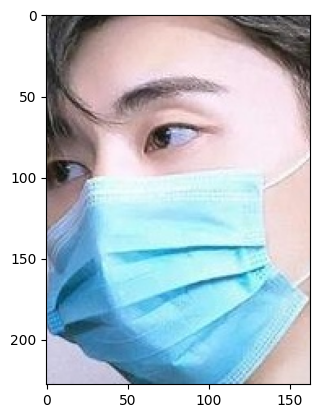

In [12]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

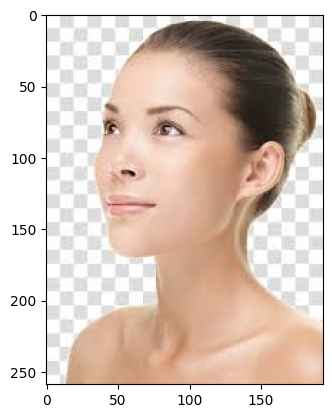

In [13]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

In [14]:
# convert images to numpy arrays+
with_mask_path = '/content/data/with_mask/'
data = []
for img_file in with_mask_files:
  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

without_mask_path = '/content/data/without_mask/'
for img_file in without_mask_files:
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [15]:
type(data)

list

In [16]:
len(data)

7553

In [17]:
data[0]

array([[[ 77,  77,  73],
        [ 77,  76,  72],
        [ 78,  78,  75],
        ...,
        [135, 134, 132],
        [135, 135, 134],
        [137, 137, 136]],

       [[ 79,  78,  74],
        [ 78,  77,  73],
        [ 78,  77,  74],
        ...,
        [137, 137, 134],
        [135, 136, 133],
        [138, 138, 137]],

       [[ 79,  78,  74],
        [ 79,  77,  75],
        [ 78,  78,  74],
        ...,
        [138, 138, 136],
        [137, 137, 136],
        [138, 138, 138]],

       ...,

       [[ 63,  60,  57],
        [ 58,  58,  54],
        [ 57,  57,  54],
        ...,
        [170, 171, 172],
        [169, 170, 171],
        [168, 168, 170]],

       [[ 62,  61,  57],
        [ 58,  58,  56],
        [ 58,  57,  56],
        ...,
        [168, 169, 168],
        [167, 168, 169],
        [167, 167, 169]],

       [[ 60,  60,  57],
        [ 62,  61,  59],
        [ 58,  57,  55],
        ...,
        [163, 164, 165],
        [159, 162, 163],
        [162, 163, 165]]

In [18]:
data[0].shape

(128, 128, 3)

In [19]:
X = np.array(data)
Y = np.array(labels)

In [20]:
type(X)
type(Y)

numpy.ndarray

In [21]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [23]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [24]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [25]:
X_train[0]

array([[[ 30,  29,  27],
        [ 36,  35,  33],
        [ 41,  40,  36],
        ...,
        [ 33,  33,  33],
        [ 29,  29,  29],
        [ 29,  29,  29]],

       [[ 33,  32,  30],
        [ 36,  35,  33],
        [ 38,  37,  34],
        ...,
        [ 35,  35,  35],
        [ 31,  31,  31],
        [ 28,  28,  28]],

       [[ 34,  32,  34],
        [ 44,  43,  42],
        [ 51,  50,  49],
        ...,
        [ 42,  42,  42],
        [ 37,  37,  37],
        [ 31,  31,  31]],

       ...,

       [[164, 190, 204],
        [161, 187, 200],
        [163, 190, 199],
        ...,
        [ 84, 106, 107],
        [ 83, 106, 106],
        [ 83, 105, 106]],

       [[ 98, 122, 134],
        [ 91, 117, 128],
        [ 99, 126, 137],
        ...,
        [ 87, 106, 110],
        [ 93, 111, 115],
        [ 86, 105, 109]],

       [[ 92, 115, 125],
        [ 89, 113, 123],
        [ 98, 124, 135],
        ...,
        [ 92, 111, 115],
        [101, 119, 123],
        [ 96, 114, 118]]

In [26]:
X_train_scaled[0]

array([[[0.11764706, 0.11372549, 0.10588235],
        [0.14117647, 0.1372549 , 0.12941176],
        [0.16078431, 0.15686275, 0.14117647],
        ...,
        [0.12941176, 0.12941176, 0.12941176],
        [0.11372549, 0.11372549, 0.11372549],
        [0.11372549, 0.11372549, 0.11372549]],

       [[0.12941176, 0.1254902 , 0.11764706],
        [0.14117647, 0.1372549 , 0.12941176],
        [0.14901961, 0.14509804, 0.13333333],
        ...,
        [0.1372549 , 0.1372549 , 0.1372549 ],
        [0.12156863, 0.12156863, 0.12156863],
        [0.10980392, 0.10980392, 0.10980392]],

       [[0.13333333, 0.1254902 , 0.13333333],
        [0.17254902, 0.16862745, 0.16470588],
        [0.2       , 0.19607843, 0.19215686],
        ...,
        [0.16470588, 0.16470588, 0.16470588],
        [0.14509804, 0.14509804, 0.14509804],
        [0.12156863, 0.12156863, 0.12156863]],

       ...,

       [[0.64313725, 0.74509804, 0.8       ],
        [0.63137255, 0.73333333, 0.78431373],
        [0.63921569, 0

In [27]:
import tensorflow as tf
from tensorflow import keras

In [28]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [29]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [30]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 15s 21ms/step - loss: 0.5455 - acc: 0.7431 - val_loss: 0.2734 - val_acc: 0.8860
Epoch 2/5
170/170 [==============================] - 3s 17ms/step - loss: 0.3148 - acc: 0.8746 - val_loss: 0.2472 - val_acc: 0.8942
Epoch 3/5
170/170 [==============================] - 3s 18ms/step - loss: 0.2573 - acc: 0.8987 - val_loss: 0.2078 - val_acc: 0.9174
Epoch 4/5
170/170 [==============================] - 3s 19ms/step - loss: 0.2118 - acc: 0.9202 - val_loss: 0.1968 - val_acc: 0.9289
Epoch 5/5
170/170 [==============================] - 3s 17ms/step - loss: 0.1781 - acc: 0.9290 - val_loss: 0.1755 - val_acc: 0.9306


In [31]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 1s 11ms/step - loss: 0.2120 - acc: 0.9133
Test Accuracy = 0.9133024215698242


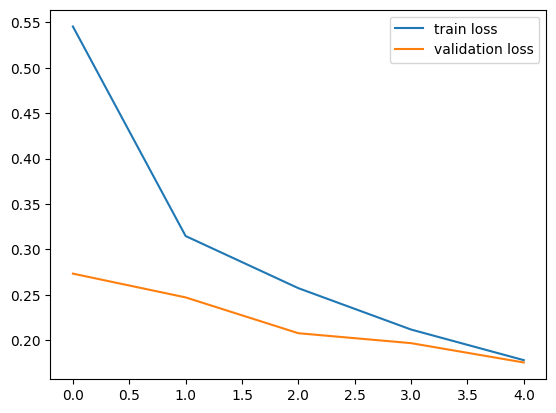

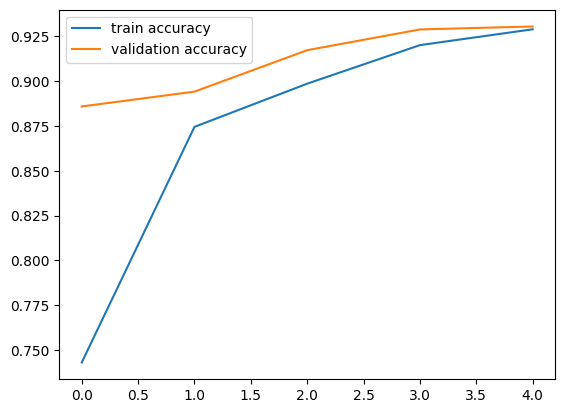

In [32]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Path of the image to be predicted: /content/data/without_mask/without_mask_1006.jpg


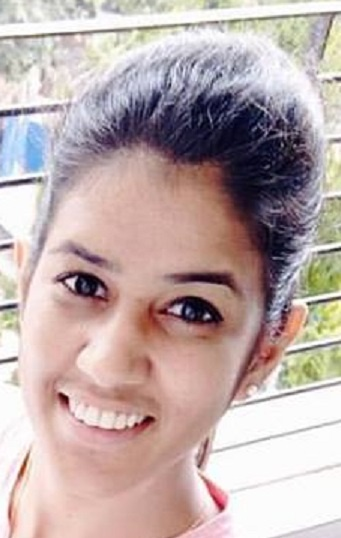

1/1 [==============================] - 0s 28ms/step
[[0.74312437 0.10285272]]
0
The person in the image is not wearing a mask


In [35]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/data/with_mask/with_mask_1070.jpg


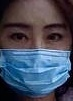

1/1 [==============================] - 0s 21ms/step
[[0.22175322 0.6380078 ]]
1
The person in the image is wearing a mask


In [37]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')